# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
darwin_df = pd.read_csv('DARWIN/DARWIN.csv')
darwin_df

ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
0      id_1       5160     0.000013    120.804174       86.853334   
1      id_2      51980     0.000016    115.318238       83.448681   
2      id_3       2600     0.000010    229.933997      172.761858   
3      id_4       2130     0.000010    369.403342      183.193104   
4      id_5       2310     0.000007    257.997131      111.275889   
..      ...        ...          ...           ...             ...   
169  id_170       2930     0.000010    241.736477      176.115957   
170  id_171       2140     0.000009    274.728964      234.495802   
171  id_172       3830     0.000008    151.536989      171.104693   
172  id_173       1760     0.000008    289.518195      196.411138   
173  id_174       2875     0.000008    235.769350      178.208024   

     max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
0                 957              6601          0.361800            0.217459   
1                1694              6998          0.272513            0.144880   
2                2333              5802          0.387020            0.181342   
3                1756              8159          0.556879            0.164502   
4                 987              4732          0.266077            0.145104   
..                ...               ...               ...                 ...   
169              1839              6439          0.253347            0.174663   
170              2053              8487          0.225537            0.174920   
171              1287              7352          0.165480            0.161058   
172              1674              6946          0.518937            0.202613   
173              1838              6560          0.567311            0.147818   

     mean_gmrt1  ...  mean_jerk_in_air25  mean_jerk_on_paper25  \
0    103.828754  ...            0.141434              0.024471   
1     99.383459  ...            0.049663              0.018368   
2    201.347928  ...            0.178194              0.017174   
3    276.298223  ...            0.113905              0.019860   
4    184.636510  ...            0.121782              0.020872   
..          ...  ...                 ...                   ...   
169  208.926217  ...            0.119152              0.020909   
170  254.612383  ...            0.174495              0.017640   
171  161.320841  ...            0.114472              0.017194   
172  242.964666  ...            0.114472              0.017194   
173  206.988687  ...            0.114472              0.017194   

     mean_speed_in_air25  mean_speed_on_paper25  num_of_pendown25  \
0               5.596487               3.184589                71   
1               1.665973               0.950249               129   
2               4.000781               2.392521                74   
3               4.206746               1.613522               123   
4               3.319036               1.680629                92   
..                   ...                    ...               ...   
169             4.508709               2.233198                96   
170             4.685573               2.806888                84   
171             3.493815               2.510601                88   
172             3.493815               2.510601                88   
173             3.493815               2.510601                88   

     paper_time25  pressure_mean25  pressure_var25  total_time25  class  
0           40120      1749.278166     296102.7676        144605      P  
1          126700      1504.768272     278744.2850        298640      P  
2           45480      1431.443492     144411.7055         79025      P  
3           67945      1465.843329     230184.7154        181220      P  
4           37285      1841.702561     158290.0255         72575      P  
..            ...              ...             ...           ...    ...  
169         44545      1798.923336     247448.3108         80335   

In [3]:
darwin_df = darwin_df.rename(columns={"class": "label"})
darwin_df['label'] = darwin_df['label'].apply(lambda x: 0 if x == 'P' else 1)

label
0    89
1    85
Name: count, dtype: int64

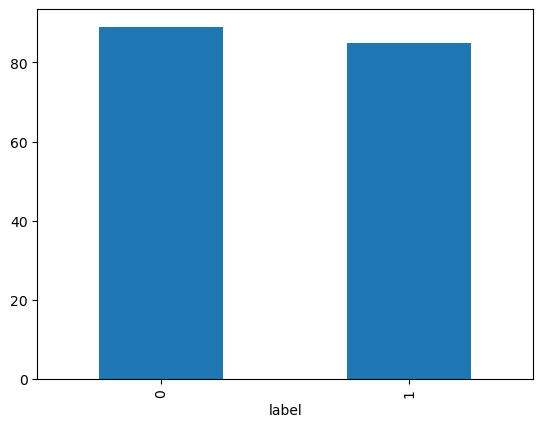

In [4]:
darwin_df['label'].value_counts().plot(kind='bar')
display(darwin_df['label'].value_counts())

The data appears to be balanced.

In [5]:
df_null = pd.DataFrame(darwin_df.isna().sum())
display(df_null)
print(df_null.loc[df_null[0] >0])

0
ID               0
air_time1        0
disp_index1      0
gmrt_in_air1     0
gmrt_on_paper1   0
...             ..
paper_time25     0
pressure_mean25  0
pressure_var25   0
total_time25     0
label            0

[452 rows x 1 columns]

Empty DataFrame
Columns: [0]
Index: []


There are no null values in the dataframe.

# Transforming and Splitting the Data

In [6]:
from sklearn.model_selection import train_test_split

split = darwin_df.drop(['ID'], axis=1)

X = split.loc[:, split.columns != 'label']
y = split['label']


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Computing required values
stand_scaler = StandardScaler()
stand_model = stand_scaler.fit(X)
stand_X = stand_model.transform(X)
 
# Print Standard scaled data
print(stand_X)

# Computing required values
minmax_scaler = MinMaxScaler()
minmax_model = minmax_scaler.fit(X)
minmax_X = minmax_model.transform(X)
 
# Print MinMax scaled data
print(minmax_X)


[[-0.03995818  0.81920081 -0.96428112 ...  0.37032387  2.34714617
  -0.03955186]
 [ 3.67080255  1.86319456 -0.99419127 ... -0.38618196  2.04090301
   0.27130989]
 [-0.24285325  0.16297617 -0.36928884 ... -0.61304649 -0.32902956
  -0.17190044]
 ...
 [-0.14536851 -0.41569466 -0.79672117 ...  0.8848363  -0.60574129
  -0.16298033]
 [-0.3094282  -0.53500823 -0.0444268  ...  0.8848363  -0.60574129
  -0.16298033]
 [-0.22105788 -0.46938576 -0.33747362 ...  0.8848363  -0.60574129
  -0.16298033]]
[[0.04636033 0.40646131 0.08079165 ... 0.83581735 0.82552264 0.02020101]
 [0.47238399 0.5379414  0.07597771 ... 0.67555935 0.77227526 0.04734748]
 [0.02306642 0.32381668 0.17655369 ... 0.62750042 0.36020824 0.00864348]
 ...
 [0.03425842 0.25093914 0.10775987 ... 0.94481154 0.31209558 0.00942244]
 [0.01542311 0.23591285 0.22883916 ... 0.94481154 0.31209558 0.00942244]
 [0.0255687  0.24417731 0.18167424 ... 0.94481154 0.31209558 0.00942244]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()

X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(stand_X, y, test_size=0.33, random_state=42)
display(X_train_stand.shape, X_test_stand.shape, y_train_stand.shape, y_test_stand.shape)
print()

X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(stand_X, y, test_size=0.33, random_state=42)
display(X_train_mm.shape, X_test_mm.shape, y_train_mm.shape, y_test_mm.shape)

(116, 450)

(58, 450)

(116,)

(58,)

(116, 450)

(58, 450)

(116,)

(58,)

(116, 450)

(58, 450)

(116,)

(58,)

#### PCA for dimensionality reduction

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

# Check the shape of the reduced dataset
print(X_reduced_train.shape) 
print(X_reduced_test.shape) 

(116, 2)
(58, 2)


In [9]:
X_reduced_train_stand = pca.fit_transform(X_train_stand)
X_reduced_test_stand = pca.transform(X_test_stand)

# Check the shape of the reduced dataset
print(X_reduced_train_stand.shape) 
print(X_reduced_test_stand.shape) 

(116, 2)
(58, 2)


In [10]:
X_reduced_train_mm = pca.fit_transform(X_train_mm)
X_reduced_test_mm = pca.transform(X_test_mm)

# Check the shape of the reduced dataset
print(X_reduced_train_mm.shape) 
print(X_reduced_test_mm.shape) 

(116, 2)
(58, 2)


# Descriptive Statistics

In [11]:
summary=[]    
for column in X_train:
    vals= X_train[column].describe()
    summary.append(vals)

In [12]:
summary

[count       116.000000
 mean       5046.025862
 std       12090.760608
 min         345.000000
 25%        1702.500000
 50%        2840.000000
 75%        4383.750000
 max      109965.000000
 Name: air_time1, dtype: float64,
 count    116.000000
 mean       0.000010
 std        0.000004
 min        0.000002
 25%        0.000008
 50%        0.000010
 75%        0.000012
 max        0.000028
 Name: disp_index1, dtype: float64,
 count    116.000000
 mean     288.744377
 std      149.966586
 min       65.234661
 25%      177.464354
 50%      259.725745
 75%      350.456046
 max      831.913143
 Name: gmrt_in_air1, dtype: float64,
 count    116.000000
 mean     194.419694
 std       91.840757
 min       47.354990
 25%      137.907448
 50%      179.626903
 75%      232.627519
 max      609.065320
 Name: gmrt_on_paper1, dtype: float64,
 count      116.000000
 mean      2062.353448
 std       1918.279525
 min        786.000000
 25%       1351.000000
 50%       1739.500000
 75%       2146.5000

In [13]:
darwin_stats = X_train.describe()
darwin_stats

air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
count     116.000000   116.000000    116.000000      116.000000   
mean     5046.025862     0.000010    288.744377      194.419694   
std     12090.760608     0.000004    149.966586       91.840757   
min       345.000000     0.000002     65.234661       47.354990   
25%      1702.500000     0.000008    177.464354      137.907448   
50%      2840.000000     0.000010    259.725745      179.626903   
75%      4383.750000     0.000012    350.456046      232.627519   
max    109965.000000     0.000028    831.913143      609.065320   

       max_x_extension1  max_y_extension1  mean_acc_in_air1  \
count        116.000000        116.000000        116.000000   
mean        2062.353448       7433.474138          0.388051   
std         1918.279525       2273.285225          0.336142   
min          786.000000       1137.000000          0.163816   
25%         1351.000000       6160.750000          0.218364   
50%         1739.500000       6913.500000          0.270395   
75%         2146.500000       8320.750000          0.414136   
max        18602.000000      15783.000000          2.322357   

       mean_acc_on_paper1  mean_gmrt1  mean_jerk_in_air1  ...  mean_gmrt25  \
count          116.000000  116.000000         116.000000  ...   116.000000   
mean             0.176817  241.582036           0.062828  ...   220.724074   
std              0.056442  108.982014           0.065741  ...    65.937141   
min              0.096631   62.040839           0.022500  ...    69.928033   
25%              0.147074  160.986344           0.029405  ...   179.656454   
50%              0.161792  231.004091           0.039594  ...   216.996980   
75%              0.184518  292.504007           0.068147  ...   264.310776   
max              0.503485  720.489231           0.447805  ...   437.373267   

       mean_jerk_in_air25  mean_jerk_on_paper25  mean_speed_in_air25  \
count          116.000000            116.000000           116.000000   
mean             0.147949              0.019914             4.463477   
std              0.062901              0.002375             1.553647   
min              0.030169              0.014987             1.323565   
25%              0.109163              0.018367             3.493815   
50%              0.140483              0.019533             4.458418   
75%              0.199856              0.021086             5.244357   
max              0.361856              0.029227            10.416715   

       mean_speed_on_paper25  num_of_pendown25   paper_time25  \
count             116.000000        116.000000     116.000000   
mean                2.836613         85.344828   43120.474138   
std                 0.840184         26.489737   18218.865914   
min                 0.950249         32.000000   22425.000000   
25%                 2.235032         65.000000   33935.000000   
50%                 2.866304         83.000000   37442.500000   
75%                 3.335828        100.000000   46666.250000   
max                 5.602909        209.000000  139575.000000   

       pressure_mean25  pressure_var25  total_time25  
count       116.000000      116.000000  1.160000e+02  
mean       1636.523434   164141.966878  1.903189e+05  
std         319.827940    54951.892888  6.046684e+05  
min         558.595486    73010.320420  3.684500e+04  
25%        1502.882877   118920.383000  5.917500e+04  
50%        1735.734577   159788.203450  7.597250e+04  
75%        1867.866859   201670.313200  1.261975e+05  
max        1961.516027   296102.767600  5.704200e+06  

[8 rows x 450 columns]

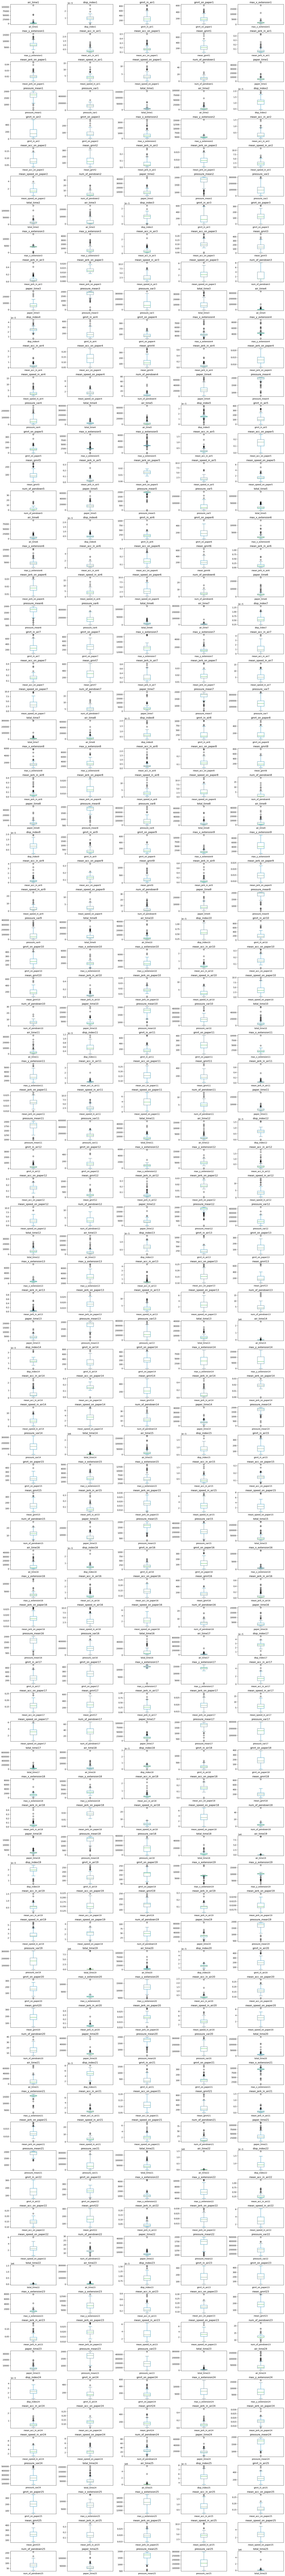

In [14]:
num_columns = len(X_train.columns)
num_rows = int(np.ceil(num_columns / 5))

fig, axes = plt.subplots(num_rows, 5, figsize=(20, 180))

axes = axes.flatten()

for i, column in enumerate(X_train.columns):
    X_train[column].plot(kind='box', ax=axes[i % (num_rows * 5)])
    axes[i % (num_rows * 5)].set_title(column)

for j in range(num_columns, num_rows * 5):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [15]:
skewValues = X_train.skew(axis=0)
print('A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution')
print('Minor positive skewness')
print(skewValues.loc[lambda x : (x > 0) & (x < 6)])
print()
print('Major positive skewness')
print(skewValues[skewValues > 5])
print()
print('A negative skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.')
print(skewValues[skewValues < 0])
print()
print('A skewness value of 0 in the output denotes a symmetrical distribution.')
print(skewValues[skewValues == 0])

A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution
Minor positive skewness
gmrt_in_air1             1.319738
gmrt_on_paper1           1.672203
max_y_extension1         0.983609
mean_acc_in_air1         3.847176
mean_acc_on_paper1       2.773770
                           ...   
mean_speed_in_air25      0.785058
mean_speed_on_paper25    0.231057
num_of_pendown25         1.310856
paper_time25             2.884744
pressure_var25           0.413283
Length: 361, dtype: float64

Major positive skewness
air_time1              6.895190
max_x_extension1       6.672678
paper_time1            6.373986
total_time1            7.249559
air_time2              5.001933
max_y_extension2       8.991838
air_time4              8.680723
num_of_pendown4        5.174173
total_time4            6.866318
air_time6              5.359694
total_time6            5.211692
air_time7              5.708158
total_time7

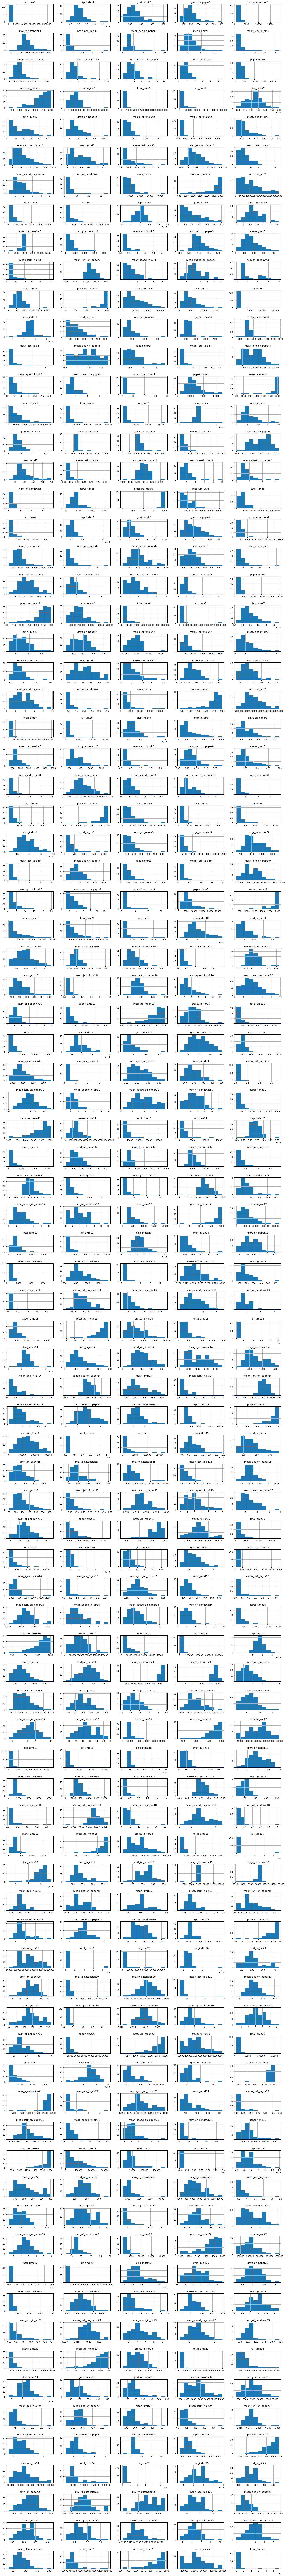

In [16]:
num_columns = len(X_train.columns)
num_rows = int(np.ceil(num_columns / 5))

fig, axes = plt.subplots(num_rows, 5, figsize=(20, 180))

axes = axes.flatten()

for i, column in enumerate(X_train.columns):
    X_train[column].hist(ax=axes[i % (num_rows * 5)])
    axes[i % (num_rows * 5)].set_title(column)

for j in range(num_columns, num_rows * 5):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Positive threshold results at 0.7

air_time2           paper_time1            0.700343
paper_time1         air_time2              0.700343
mean_gmrt10         mean_gmrt11            0.700530
mean_gmrt11         mean_gmrt10            0.700530
gmrt_on_paper11     mean_acc_on_paper11    0.701241
                                             ...   
air_time14          total_time14           0.999820
mean_jerk_in_air17  mean_acc_in_air17      0.999842
mean_acc_in_air17   mean_jerk_in_air17     0.999842
total_time19        air_time19             0.999992
air_time19          total_time19           0.999992
Length: 808, dtype: float64

Positive threshold results at 0.989999

air_time23          total_time23          0.991035
total_time23        air_time23            0.991035
air_time17          total_time17          0.991594
total_time17        air_time17            0.991594
mean_jerk_in_air22  mean_acc_in_air22     0.992569
                                            ...   
air_time14       

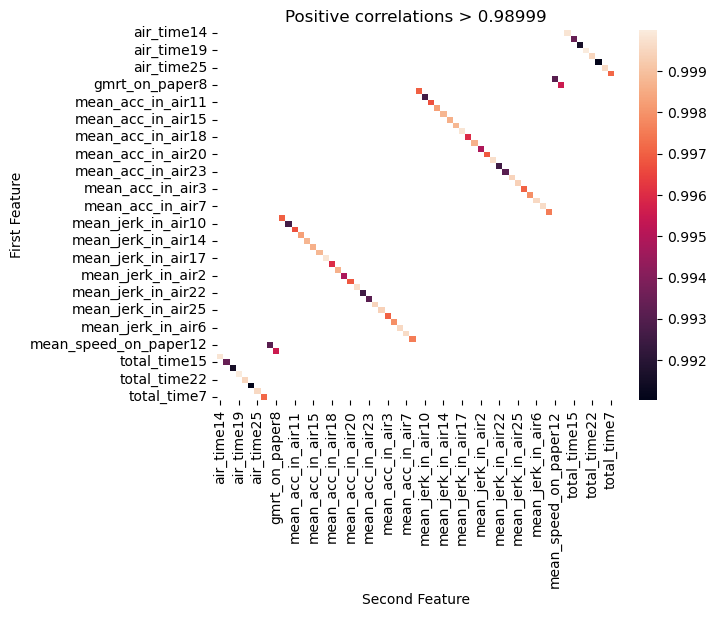

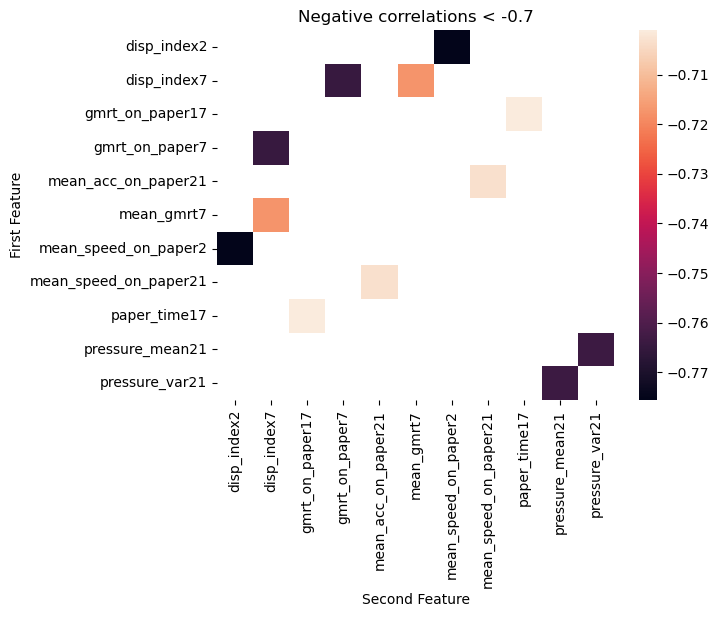

In [17]:
import seaborn as sns

train = pd.concat([X_train, y_train], axis=1)

pos_threshold_cm = 0.989999
pos_threshold = 0.7
neg_threshold = 0.7

correlation_matrix = train.corr()
correlation_matrix

pos_cor_mat = correlation_matrix[(correlation_matrix > pos_threshold_cm) & (correlation_matrix != 1)]
pos_seven = correlation_matrix[(correlation_matrix > pos_threshold) & (correlation_matrix != 1)]

print()
print('Positive threshold results at 0.7')
print()
pos_seven_sorted = pos_seven.unstack().sort_values().dropna()
print(pos_seven_sorted)

print()
print('Positive threshold results at 0.989999')
print()
pos_sorted_mat = pos_cor_mat.unstack().sort_values().dropna()
print(pos_sorted_mat)

pos_sorted_mat = pd.DataFrame(pos_sorted_mat)

pos_sorted_mat = pos_sorted_mat.reset_index()
pos_sorted_mat.columns =['First Feature', 'Second Feature', 'Correlation Score']
pos_sorted_mat = pos_sorted_mat.pivot(index="First Feature", columns="Second Feature", values="Correlation Score")

neg_cor_mat = correlation_matrix[(correlation_matrix < -neg_threshold) & (correlation_matrix != 1)]

print()
print('Negative threshold results at -0.7')
print()
neg_sorted_mat = neg_cor_mat.unstack().sort_values().dropna()
print(neg_sorted_mat)

neg_sorted_mat = pd.DataFrame(neg_sorted_mat)

neg_sorted_mat = neg_sorted_mat.reset_index()
neg_sorted_mat.columns =['First Feature', 'Second Feature', 'Correlation Score']
neg_sorted_mat = neg_sorted_mat.pivot(index="First Feature", columns="Second Feature", values="Correlation Score")

sns.heatmap(pos_sorted_mat)
plt.title('Positive correlations > 0.98999')
plt.show()
plt.title('Negative correlations < -0.7')
sns.heatmap(neg_sorted_mat)
plt.show()

There are many positively correlated values above 0.7, 758, displayed in the correlation matrix is thresholds above 0.989999 which is 68 features. The amount of negatively correlated features lower than -0.7, there are 6 features.

# Models

### Machine Learning Models

#### Support Vector Machine regular data

In [18]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [19]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  51.72
F1 (Polynomial Kernel):  37.05


In [20]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  50.00
F1 (RBF Kernel):  33.33


#### Support Vector Machine StandardScaler data

In [21]:
rbf_stand = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_stand, y_train_stand)
poly_stand = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train_stand, y_train_stand)

poly_pred_stand = poly_stand.predict(X_test_stand)
rbf_pred_stand = rbf_stand.predict(X_test_stand)

In [22]:
poly_accuracy_stand = accuracy_score(y_test_stand, poly_pred_stand)
poly_f1_stand = f1_score(y_test_stand, poly_pred_stand, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_stand*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_stand*100))

Accuracy (Polynomial Kernel):  60.34
F1 (Polynomial Kernel):  52.95


In [23]:
rbf_accuracy_stand = accuracy_score(y_test_stand, rbf_pred_stand)
rbf_f1_stand = f1_score(y_test_stand, rbf_pred_stand, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_stand*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_stand*100))

Accuracy (RBF Kernel):  50.00
F1 (RBF Kernel):  33.33


#### Support Vector Machine MinMaxScaler

In [24]:
rbf_mm = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_mm, y_train_mm)
poly_mm = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train_mm, y_train_mm)

poly_pred_mm = poly_stand.predict(X_test_mm)
rbf_pred_mm = rbf_stand.predict(X_test_mm)

In [25]:
poly_accuracy_mm = accuracy_score(y_test_mm, poly_pred_mm)
poly_f1_mm = f1_score(y_test_mm, poly_pred_mm, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_mm*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_mm*100))

Accuracy (Polynomial Kernel):  60.34
F1 (Polynomial Kernel):  52.95


In [26]:
rbf_accuracy_mm = accuracy_score(y_test_mm, rbf_pred_mm)
rbf_f1_mm = f1_score(y_test_mm, rbf_pred_mm, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_mm*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_mm*100))

Accuracy (RBF Kernel):  50.00
F1 (RBF Kernel):  33.33


#### Support Vector Machine and PCA

In [27]:
rbf_red = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_reduced_train, y_train)
poly_red = svm.SVC(kernel='poly', degree=3, C=1).fit(X_reduced_train, y_train)

poly_pred_red = poly_red.predict(X_reduced_test)
rbf_pred_red = rbf_red.predict(X_reduced_test)

In [28]:
poly_accuracy_red = accuracy_score(y_test, poly_pred_red)
poly_f1_red = f1_score(y_test, poly_pred_red, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_red*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_red*100))

Accuracy (Polynomial Kernel):  51.72
F1 (Polynomial Kernel):  37.05


In [29]:
rbf_accuracy_red = accuracy_score(y_test, rbf_pred_red)
rbf_f1_red = f1_score(y_test, rbf_pred_red, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_red*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_red*100))

Accuracy (RBF Kernel):  50.00
F1 (RBF Kernel):  33.33


#### Support Vector Machine StandardScaler and PCA

In [30]:
rbf_stand_red = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_reduced_train_stand, y_train_stand)
poly_stand_red = svm.SVC(kernel='poly', degree=3, C=1).fit(X_reduced_train_stand, y_train_stand)

poly_pred_stand_red = poly_stand_red.predict(X_reduced_test_stand)
rbf_pred_stand_red = rbf_stand_red.predict(X_reduced_test_stand)

In [31]:
poly_accuracy_stand_red = accuracy_score(y_test_stand, poly_pred_stand_red)
poly_f1_stand_red = f1_score(y_test_stand, poly_pred_stand_red, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_stand_red*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_stand_red*100))

Accuracy (Polynomial Kernel):  74.14
F1 (Polynomial Kernel):  72.28


In [32]:
rbf_accuracy_stand_red = accuracy_score(y_test_stand, rbf_pred_stand_red)
rbf_f1_stand_red = f1_score(y_test_stand, rbf_pred_stand_red, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_stand_red*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_stand_red*100))

Accuracy (RBF Kernel):  50.00
F1 (RBF Kernel):  33.33


#### Support Vector Machine MinMaxScaler and PCA

In [33]:
rbf_mm_red = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_reduced_train_mm, y_train_mm)
poly_mm_red = svm.SVC(kernel='poly', degree=3, C=1).fit(X_reduced_train_mm, y_train_mm)

poly_pred_mm_red = poly_mm_red.predict(X_reduced_test_mm)
rbf_pred_mm_red = rbf_mm_red.predict(X_reduced_test_mm)

In [34]:
poly_accuracy_mm_red = accuracy_score(y_test_mm, poly_pred_mm_red)
poly_f1_mm_red = f1_score(y_test_mm, poly_pred_mm_red, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_mm_red*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_mm_red*100))

Accuracy (Polynomial Kernel):  74.14
F1 (Polynomial Kernel):  72.28


In [35]:
rbf_accuracy_mm_red = accuracy_score(y_test_mm, rbf_pred_mm_red)
rbf_f1_mm_red = f1_score(y_test_mm, rbf_pred_mm_red, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_mm_red*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_mm_red*100))

Accuracy (RBF Kernel):  50.00
F1 (RBF Kernel):  33.33


### Deep Learning Models